In [1]:
"""
TODO
 - zmiana mutacji na stałą wariancję
 - eksperyment: populacja daleko od optimum. Zobaczyć jak dla 10, 20, 50 pokolenia zmieniają się drzewa genealogiczne
 - eksperyment: populacja rozrzucona wokół punktu (0,0)
 - eksperyment: dla funkcji stałej = 0 zobaczyć jak będzie wyglądało drzewo
 - eksperyment: dla funkcji sinus o częstotliwości dużo mniejszej niż wariancja mutacji (funkcja Shoeffera)
 
"""

'\nTODO\n - zmiana mutacji na stałą wariancję\n - eksperyment: populacja daleko od optimum. Zobaczyć jak dla 10, 20, 50 pokolenia zmieniają się drzewa genealogiczne\n - eksperyment: populacja rozrzucona wokół punktu (0,0)\n - eksperyment: dla funkcji stałej = 0 zobaczyć jak będzie wyglądało drzewo\n - eksperyment: dla funkcji sinus o częstotliwości dużo mniejszej niż wariancja mutacji (funkcja Shoeffera)\n \n'

# imports

In [2]:
import warnings
warnings.filterwarnings('ignore')

import sys
from os import listdir
from typing import Tuple, List, Dict
import json
from json import JSONDecodeError
import pickle

from tqdm import tqdm

import pandas as pd
import numpy as np
from numpy.linalg import norm
import networkx as nx

from src.evolution.config import DATA_PATH
from src.evolution.graph_utils import pickle_to_graph

from networkx.drawing.nx_pydot import graphviz_layout

# funcs

In [3]:
def get_experiment_id(fname: str) -> str:
    return fname[:fname.find('_')]


def get_list_of_res(folder_name: str) -> List[Dict]:
    f_dir = f'{DATA_PATH}{folder_name}/json'
    list_of_res = []
    for fname in listdir(f_dir):
        with open(f'{f_dir}/{fname}', 'r') as file:
            try:
                res = json.load(file)
            except JSONDecodeError:
                pass
        list_of_res.append(res)
    return list_of_res

def get_res_dict(list_of_res: List[Dict], folder : str, first_n_elements: int = None, list_of_ids: List[str] = None) -> Dict:
    res_dict = {}
    if list_of_ids:
        list_of_res = [item for item in list_of_res if item['experiment_id'] in list_of_ids]
    iterable = list_of_res[:first_n_elements] if first_n_elements else list_of_res
    for item in tqdm(iterable):
        item['final_population'] = pd.read_csv(f'{DATA_PATH}{folder}/csv/{item["experiment_id"]}_population.csv')
        item['population_log'] = pd.read_csv(f'{DATA_PATH}{folder}/csv/{item["experiment_id"]}_log.csv')
        item['graph_trimmed'] = pickle_to_graph(item['graph_trimmed_path'], folder)
        item['graph_full'] = pickle_to_graph(item['graph_full_path'], folder)
        res_dict[item['experiment_id']] = item
    return res_dict 

def get_complete_data(folder: str, **kwargs):
    res_list = get_list_of_res(folder)
    res_df = pd.DataFrame(res_list)
    res_dict = get_res_dict(res_list, folder, **kwargs)
    return res_list, res_df, res_dict

def draw_tree(res_dict, exp_id: str, mode: str = 'trimmed'):
    graph = res_dict[exp_id][f'graph_{mode}']
    colors = ['red' if node[1]['final'] else 'blue' for node in graph.nodes(data=True)]
    pos = graphviz_layout(graph, prog="dot")
    nx.draw(graph, pos, node_color=colors)

# eval data for transformer

In [4]:
folder = ''
# res_list, res_df, res_dict = get_complete_data(folder)
res_list = get_list_of_res(folder)
res_df = pd.DataFrame(res_list)

In [5]:
res_df.shape

(20000, 18)

In [6]:
population_logs = []
for csv_path in tqdm(res_df['population_log_csv_path'].to_list()):
    population_logs.append(pd.read_csv(csv_path))



# res_df['population_log'] = population_logs
#.groupby(by='population_num').fitness.min()[0]
res_df

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [05:58<00:00, 55.74it/s]


,fitness_mean,fitness_min,fitness_std,global_min,global_min_coords,target_fun,experiment_id,pop_size,iter_num,dim,mutation_rate,mutation_std_dev,elitist,save_data,final_population_csv_path,population_log_csv_path,graph_trimmed_path,graph_full_path
0,1.248708e+07,1.179907e+07,4.161308e+05,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",egg,00054fd6-3d53-456e-8db1-0c9ed3388193,20,50,40,1.0,20.0,False,True,data/csv/00054fd6-3d53-456e-8db1-0c9ed3388193_...,data/csv/00054fd6-3d53-456e-8db1-0c9ed3388193_...,00054fd6-3d53-456e-8db1-0c9ed3388193_small.pkl,00054fd6-3d53-456e-8db1-0c9ed3388193_full.pkl
1,5.324794e+05,3.745154e+05,9.307714e+04,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",egg,000702e3-ef4b-4c2e-8021-73fa953c4e8a,20,50,40,1.0,20.0,False,True,data/csv/000702e3-ef4b-4c2e-8021-73fa953c4e8a_...,data/csv/000702e3-ef4b-4c2e-8021-73fa953c4e8a_...,000702e3-ef4b-4c2e-8021-73fa953c4e8a_small.pkl,000702e3-ef4b-4c2e-8021-73fa953c4e8a_full.pkl
2,1.039589e+07,9.014214e+06,6.608969e+05,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",egg,0009e6c0-f25b-40dd-a6c6-ef295354a16f,20,50,40,1.0,20.0,False,True,data/csv/0009e6c0-f25b-40dd-a6c6-ef295354a16f_...,data/csv/0009e6c0-f25b-40dd-a6c6-ef295354a16f_...,0009e6c0-f25b-40dd-a6c6-ef295354a16f_small.pkl,0009e6c0-f25b-40dd-a6c6-ef295354a16f_full.pkl
3,1.082813e+08,1.053951e+08,1.832622e+06,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",egg,000b068f-266e-4a54-96ba-48e75747f26b,20,50,40,1.0,20.0,False,True,data/csv/000b068f-266e-4a54-96ba-48e75747f26b_...,data/csv/000b068f-266e-4a54-96ba-48e75747f26b_...,000b068f-266e-4a54-96ba-48e75747f26b_small.pkl,000b068f-266e-4a54-96ba-48e75747f26b_full.pkl
4,2.552033e+06,2.203583e+06,1.900240e+05,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",egg,000ca38d-6a45-4cf9-953a-c11ae5b4a6a9,20,50,40,1.0,20.0,False,True,data/csv/000ca38d-6a45-4cf9-953a-c11ae5b4a6a9_...,data/csv/000ca38d-6a45-4cf9-953a-c11ae5b4a6a9_...,000ca38d-6a45-4cf9-953a-c11ae5b4a6a9_small.pkl,000ca38d-6a45-4cf9-953a-c11ae5b4a6a9_full.pkl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.564955e+06,3.868747e+06,3.576206e+05,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",egg,ffeff8a4-34c1-42d0-a081-f03eec6a8e3f,20,50,40,1.0,20.0,False,True,data/csv/ffeff8a4-34c1-42d0-a081-f03eec6a8e3f_...,data/csv/ffeff8a4-34c1-42d0-a081-f03eec6a8e3f_...,ffeff8a4-34c1-42d0-a081-f03eec6a8e3f_small.pkl,ffeff8a4-34c1-42d0-a081-f03eec6a8e3f_full.pkl
19996,2.627869e+06,2.287922e+06,1.758899e+05,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",egg,fff00d01-97d7-4f5d-8cd1-76beb0899ff7,20,50,40,1.0,20.0,False,True,data/csv/fff00d01-97d7-4f5d-8cd1-76beb0899ff7_...,data/csv/fff00d01-97d7-4f5d-8cd1-76beb0899ff7_...,fff00d01-97d7-4f5d-8cd1-76beb0899ff7_small.pkl,fff00d01-97d7-4f5d-8cd1-76beb0899ff7_full.pkl
19997,1.080432e+06,8.660704e+05,1.145194e+05,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",egg,fff7daf4-ba2a-4a85-8619-a86a265351fb,20,50,40,1.0,20.0,False,True,data/csv/fff7daf4-ba2a-4a85-8619-a86a265351fb_...,data/csv/fff7daf4-ba2a-4a85-8619-a86a265351fb_...,fff7daf4-ba2a-4a85-8619-a86a265351fb_small.pkl,fff7daf4-ba2a-4a85-8619-a86a265351fb_full.pkl
19998,6.710908e+07,6.442720e+07,1.310799e+06,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",egg,fff96b09-5ecd-4d0a-85a8-5cc2fbde20e9,20,50,40,1.0,20.0,False,True,data/csv/fff96b09-5ecd-4d0a-85a8-5cc2fbde20e9_...,data/csv/fff96b09-5ecd-4d0a-85a8-5cc2fbde20e9_...,fff96b09-5ecd-4d0a-85a8-5cc2fbde20e9_small.pkl,fff96b09-5ecd-4d0a-85a8-5cc2fbde20e9_full.pkl


In [7]:
# res_df['first_min'] = res_df['population_log'].apply(lambda x: x.groupby(by='population_num').fitness.min()[0])

res_df['first_min'] = [x.groupby(by='population_num').fitness.min()[0] for x in population_logs]

In [8]:
(res_df.fitness_min/res_df.first_min).quantile(0.2)

0.2820260270673972

In [9]:
res_df.groupby(by='iter_num').fitness_min.quantile(0.1)

iter_num
50    723042.025432
Name: fitness_min, dtype: float64

<Axes: >

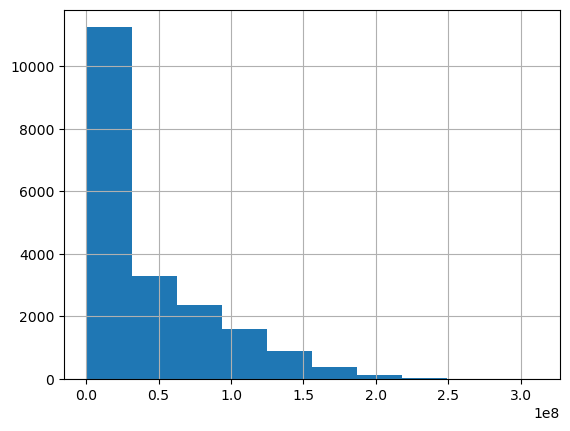

In [12]:
res_df[(res_df.iter_num == 50)].fitness_min.hist()

In [14]:
selected_ids = []
# for iter_num in res_df['iter_num'].unique():
for iter_num in [50]:
    temp_df = res_df[res_df['iter_num'] == iter_num]
    threshold = (temp_df.fitness_min/temp_df.first_min).quantile(0.2)
    selected_ids += temp_df[((temp_df.fitness_min/temp_df.first_min) <= threshold)].experiment_id.to_list()

print(len(selected_ids))

4000


In [15]:
# res_dict = get_res_dict(res_list, folder, list_of_ids=selected_ids)

In [16]:
from copy import deepcopy


def vectors_to_token(current_vector, prev_vector):
    cosine_sim = np.dot(current_vector, prev_vector)/(norm(current_vector)*norm(prev_vector))
    norm_ratio = norm(current_vector) / norm(prev_vector)
    return (cosine_sim, norm_ratio)

def tree_to_token_sequence(G):
    # Identify all leaf nodes
    leaf_nodes = [node for node in G.nodes if G.out_degree(node) == 0]

    # Find the leaf node with the lowest fitness value
    min_fitness_leaf = min(leaf_nodes, key=lambda node: G.nodes[node]['fitness'])

    # Find the path from the root to this leaf node
    root = next(node for node in G.nodes if G.in_degree(node) == 0)
    path = nx.shortest_path(G, source=root, target=min_fitness_leaf)
    
    vectors = []
    for i, point in enumerate(path):
        if i == 0:
            continue
        parent_coords = G.nodes[path[i-1]]['coordinates']
        current_coords = G.nodes[point]['coordinates']
        vectors.append(current_coords - parent_coords)

    sequence = []
    for i, vector in enumerate(vectors):
        if i == 0:
            continue
        sequence.append(vectors_to_token(vector, vectors[i-1]))
    
    return sequence


def str_to_np_array(s):
    arr = s.strip('[]').split()
    arr = np.array([float(item) for item in arr])
    return arr

def get_populations_means(population_log: pd.DataFrame) -> List[np.ndarray]:
    population_log = deepcopy(population_log)
    population_log['coordinates'] = population_log['coordinates'].apply(lambda x: str_to_np_array(x))
    means = population_log.groupby(by='population_num')['coordinates'].mean().to_list()
    return means

def points_to_vectors(points: List[np.ndarray]) -> List[np.ndarray]:
    vectors = []
    for i, point in enumerate(points):
        if i == 0:
            continue
        vectors.append(point - points[i-1])
    return vectors

def population_log_to_token_sequence(population_log: pd.DataFrame) -> List[Tuple]:
    means = get_populations_means(population_log)
    vectors = points_to_vectors(means)
    sequence = []
    for i, vector in enumerate(vectors):
        if i == 0:
            continue
        sequence.append(vectors_to_token(vector, vectors[i-1]))
    return sequence

In [17]:
transformer_data = []

selected_populations_ids = res_df[res_df['experiment_id'].isin(selected_ids)].index
selected_population_logs = [population_logs[i] for i in selected_populations_ids]

# selected_population_logs = res_df[res_df['experiment_id'].isin(selected_ids)]['population_log'].to_list()

for population_log in tqdm(selected_population_logs):
    transformer_data.append(population_log_to_token_sequence(population_log))

print(len(transformer_data))

transformer_data_array = np.array(transformer_data)

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [02:15<00:00, 29.43it/s]

4000


In [18]:
# iter_num = 50
# target_fun = 'Hypersphere'

# transformer_data = []
# for reduced_graph in tqdm([
#     res['graph_trimmed'] for res in res_dict.values()
#     if (res['iter_num'] == iter_num) 
#     and (res['target_fun'] == target_fun)
    
# ]):
#     transformer_data.append(tree_to_token_sequence(reduced_graph))

# print(len(transformer_data))

# transformer_data_array = np.array(transformer_data)

In [19]:
transformer_data_array[0].mean(axis=0)

array([0.26202757, 1.09824006])

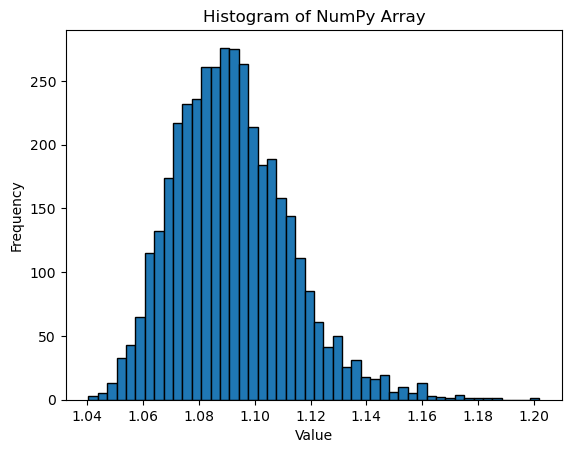

In [20]:
import matplotlib.pyplot as plt

# hist, bin_edges =  np.histogram(transformer_data_array.mean(axis=1)[:,0])
plt.hist(transformer_data_array.mean(axis=1)[:,1], bins='auto', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NumPy Array')
plt.show()

In [21]:
with open(f'data/sequences_egg_{iter_num}_means_tokenized_dim_40.pkl', 'wb') as file:
    pickle.dump(transformer_data_array, file)

# Sphere far away

In [5]:
folder = 'sphere far'
res_list, res_df, res_dict = get_complete_data(folder, first_n_elements=200)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 81.93it/s]


In [21]:
for node in res_dict['00790946-059e-4482-a52a-6f58f7b2e1e1']['graph_trimmed'].nodes(data=True):
    print(node)
    break

(299060, {'coordinates': array([813.80114661, 811.66432062]), 'fitness': 1321071.275592844})


### iter = 10

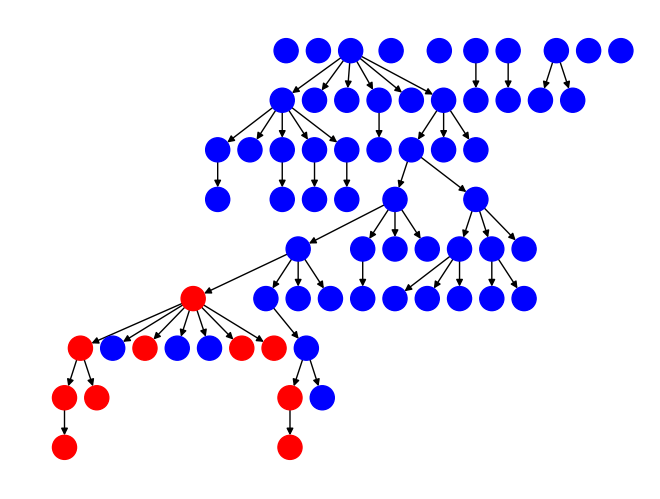

In [18]:
# moderate mutation, elitist, 2 dim
draw_tree(res_dict, '005dcf18-32ec-4bbb-ac8f-afd8f861735a', 'full')

In [19]:
# moderate mutation, non-elitist, 2 dim
draw_tree(res_dict, '00790946-059e-4482-a52a-6f58f7b2e1e1', 'trimmed')

KeyError: 'final'

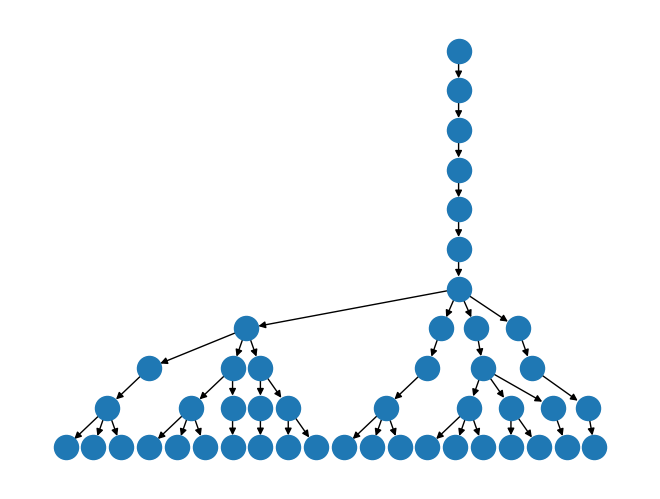

In [23]:
# very low mutation, non-elitist, 2 dim
draw_tree(res_dict, '01a6979a-ff94-4bfb-a2f8-41e467b84293', 'trimmed')

### iter = 20

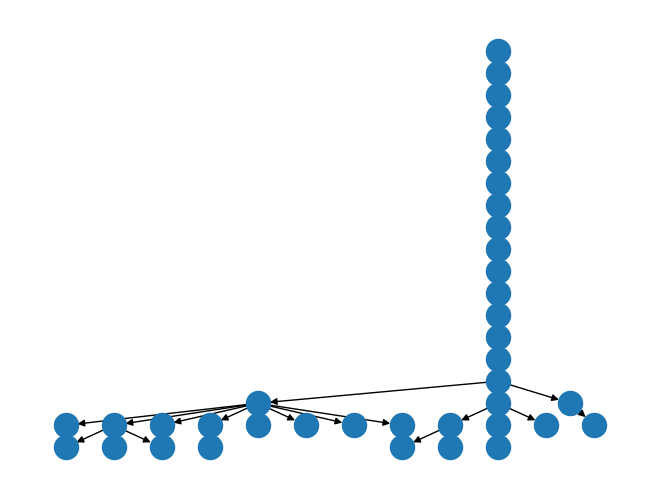

In [27]:
# moderate mutation, elitist, 2 dim
draw_tree(res_dict, '05bb0fba-c02a-4a2b-9e5d-3e8b295de5a9', 'trimmed')

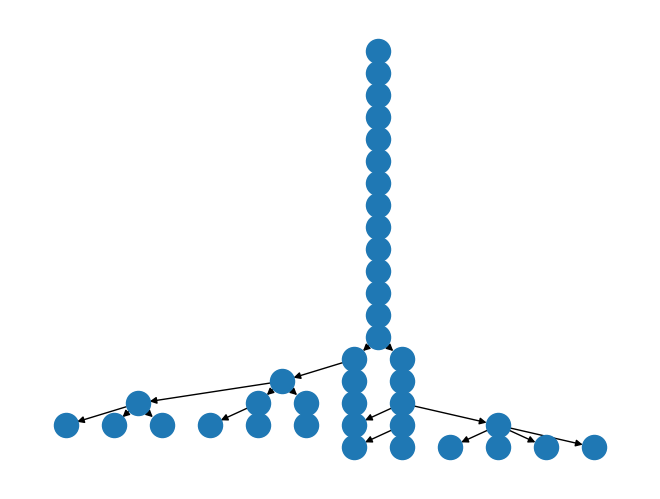

In [28]:
# very high mutation, non-elitist, 2 dim
draw_tree(res_dict, '06da5f36-f7f3-4b7c-9a00-b8dffa19a681', 'trimmed')

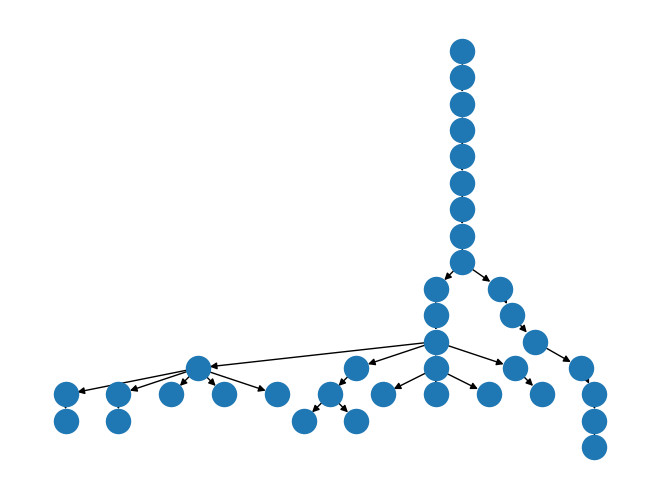

In [29]:
# very high mutation, elitist, 10 dim
draw_tree(res_dict, '0a61fe57-12f7-4ea9-9381-815ce1b47c64', 'trimmed')

### iter = 50 

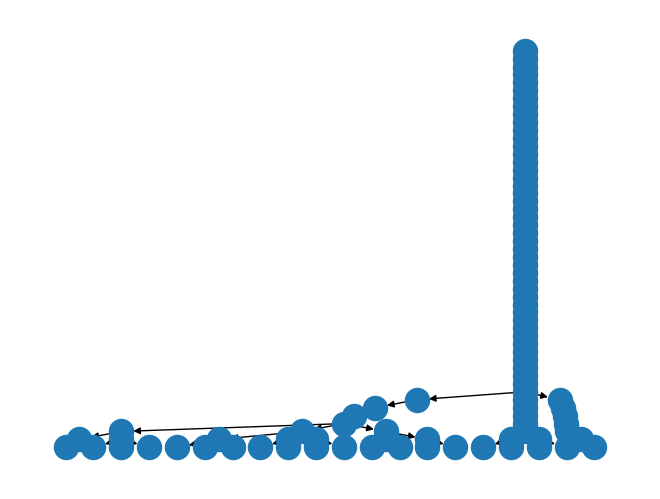

In [32]:
draw_tree(res_dict, '04b4bc27-17f4-4412-9006-272452bf0404', 'trimmed')

# Sphere scattered around center 

In [63]:
folder = 'sphere scattered'
res_list, res_df, res_dict = get_complete_data(folder, first_n_elements=200)

100%|████| 200/200 [00:04<00:00, 45.64it/s]


### iter = 10 

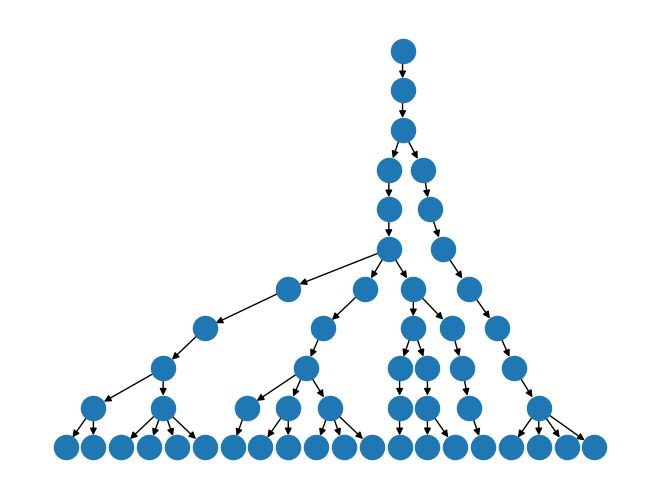

In [36]:
# very small mutation, non-elitist, 2 dim
draw_tree(res_dict, '018381fd-a123-476a-b0e4-2105d584fde3', 'trimmed')

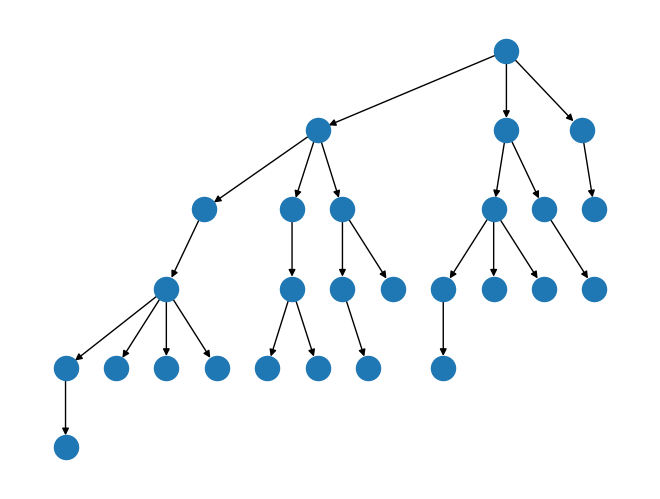

In [65]:
draw_tree(res_dict, '0a812166-9828-429e-a1b9-874f66a1cee3', 'trimmed')

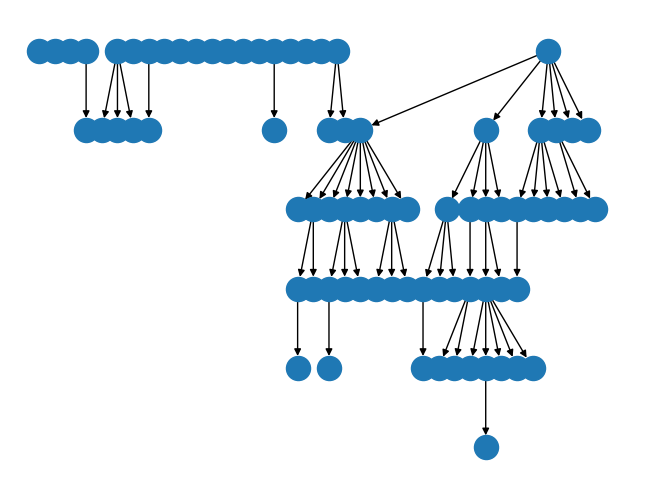

In [64]:
# large mutation, elitist, 2 dim
# draw_tree(res_dict, '0a812166-9828-429e-a1b9-874f66a1cee3', 'trimmed')
draw_tree(res_dict, '0a812166-9828-429e-a1b9-874f66a1cee3', 'full')

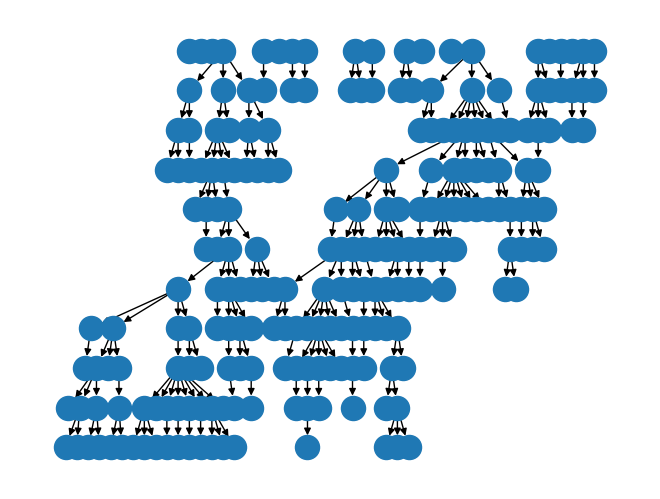

In [66]:
# large mutation, non-elitist, 2 dim
draw_tree(res_dict, '0a72e354-4036-43e2-971b-44f6f77d3661', 'full')

### iter = 20 

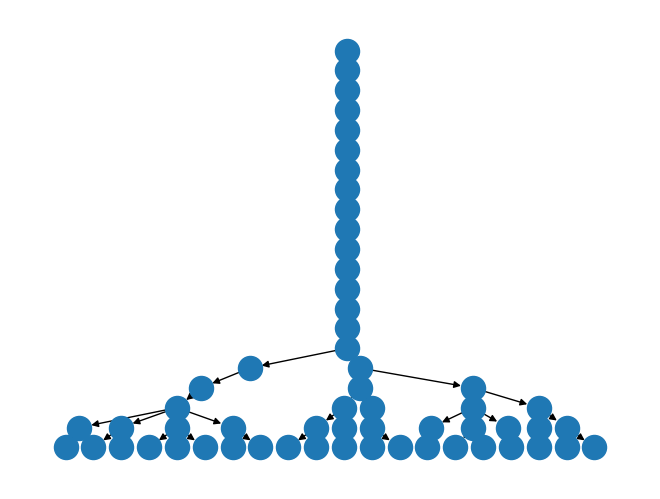

In [40]:
# very small mutation, elitist, 5 dim
draw_tree(res_dict, '04c2752d-2fa6-4eb0-a3e4-b6eb9eb7440c', 'trimmed')

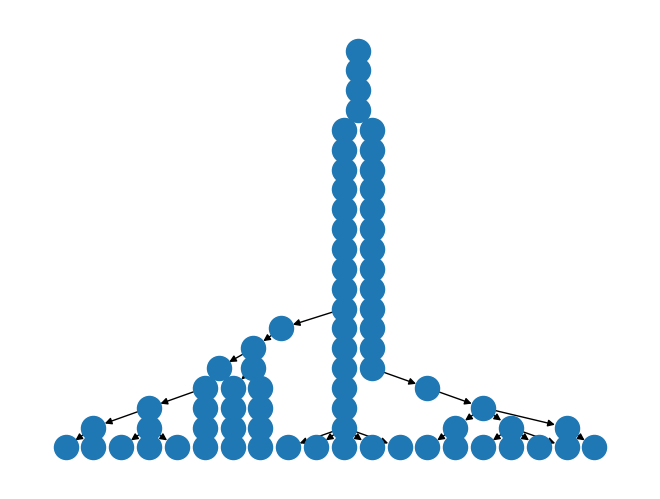

In [41]:
# very large mutation, non-elitist, 5 dim
draw_tree(res_dict, '0bc26a2b-aca5-4f34-989f-c1b54a902868', 'trimmed')

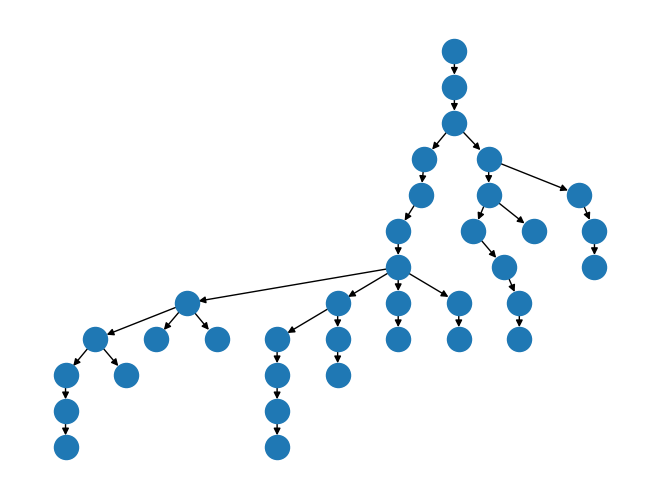

In [43]:
# very large mutation, elitist, 2 dim
draw_tree(res_dict, '0c180a47-1440-4a37-8984-f9d713feda01', 'trimmed')

### iter = 50

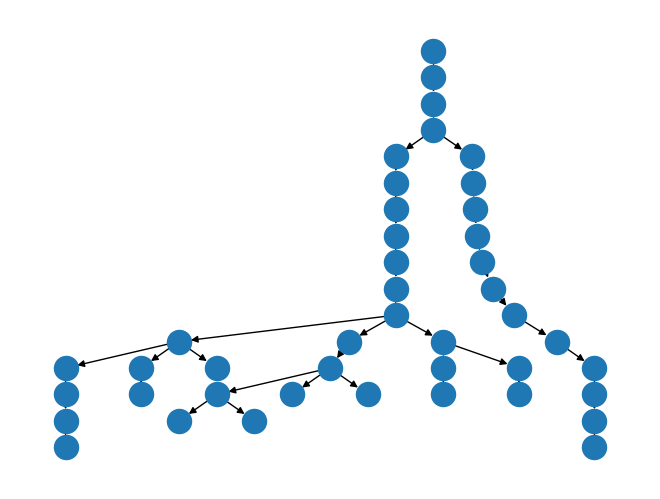

In [46]:
# very large mutation, elitist, 5 dim
draw_tree(res_dict, '06f4a928-55ba-4710-9d41-67ee6dc135ef', 'trimmed')

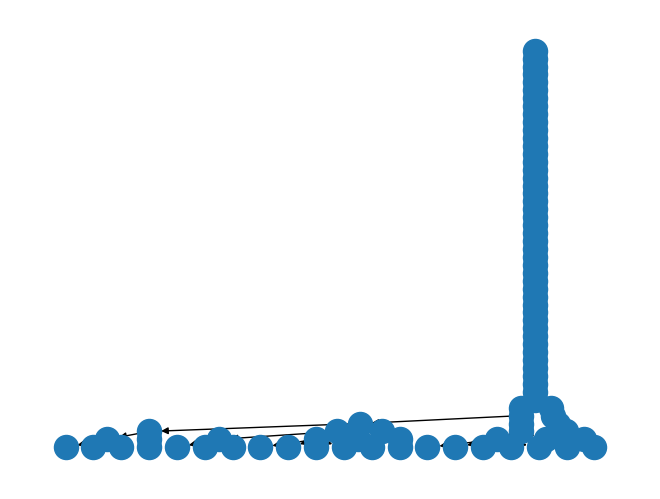

In [48]:
# very large mutation, non-elitist, 5 dim
draw_tree(res_dict, '132cf6eb-37ed-47dc-99ef-29e242bc4abb', 'trimmed')

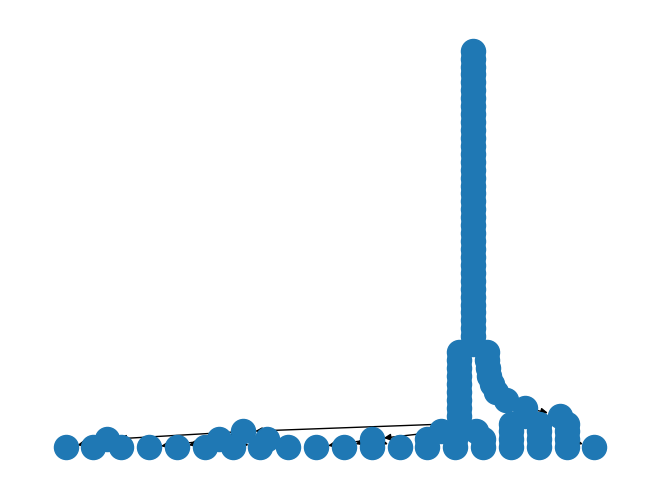

In [49]:
# moderate mutation, non-elitist, 5 dim
draw_tree(res_dict, '09ee8931-679b-4e96-a98d-5f0767e10aca', 'trimmed')

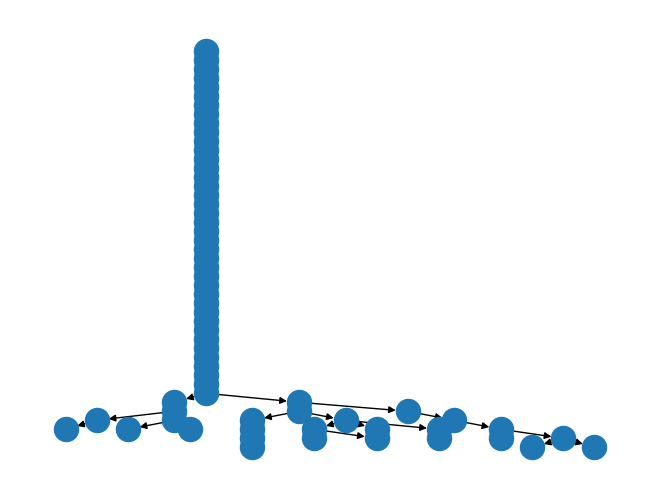

In [53]:
# moderate mutation, elitist, 5 dim
draw_tree(res_dict, '112991d4-adeb-429c-89fb-3ad88139e45f', 'trimmed')

# Zero function

In [4]:
folder = 'zero function'
res_list, res_df, res_dict = get_complete_data(folder, first_n_elements=100)

100%|███████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.84it/s]


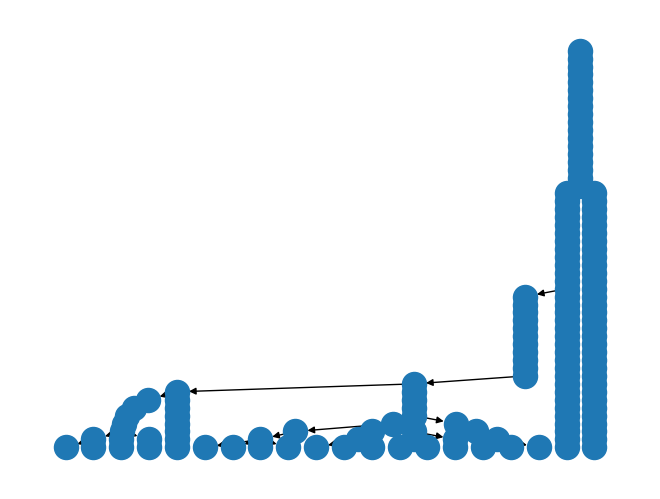

In [11]:
draw_tree(res_dict, '00172e4a-a755-4d62-afd5-67d40af94820', 'trimmed')

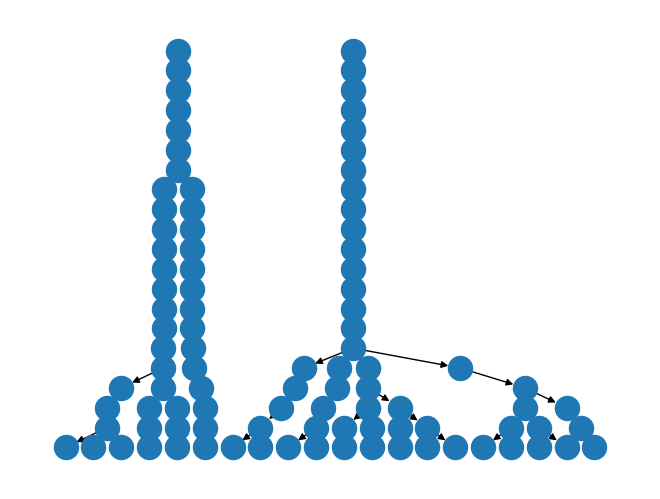

In [13]:
draw_tree(res_dict, '0032df37-085d-43a0-be59-9aaea4e64170', 'trimmed')

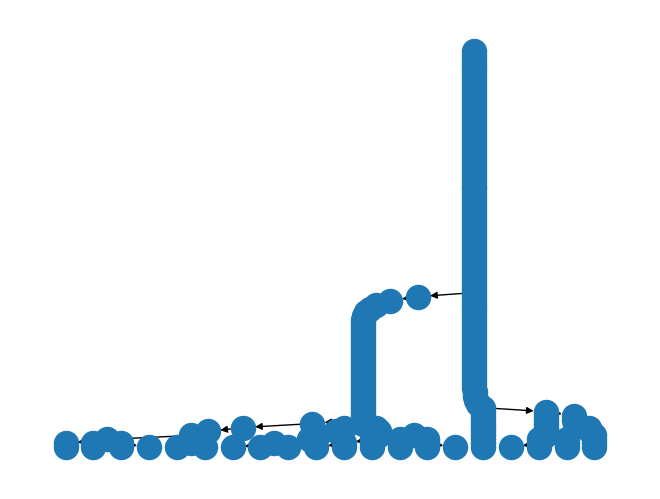

In [15]:
draw_tree(res_dict, '002ac96d-88a6-4229-8bd2-29b00c8150b1', 'trimmed')

# schwefel function

In [54]:
folder = 'schwefel function'
res_list, res_df, res_dict = get_complete_data(folder)

100%|██████████████████████████████████████████████████| 240/240 [00:02<00:00, 110.46it/s]


In [62]:
# res_df[(res_df['iter_num'] == 50) & (res_df['dim'] == 10) & (res_df['elitist'] == True)]

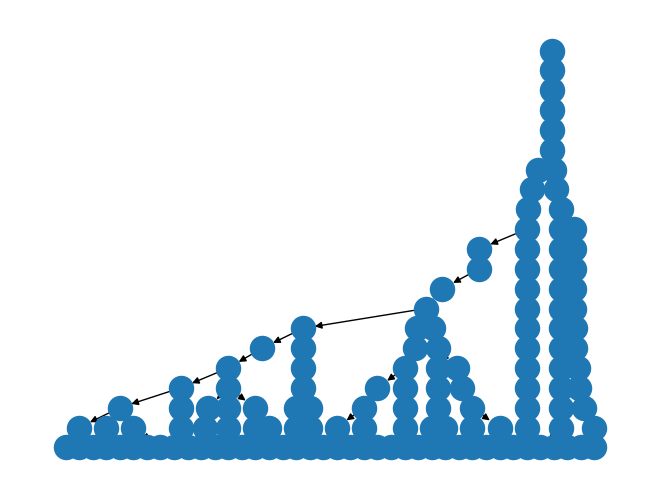

In [57]:
# high pop size, 10 dim, non-elitist
draw_tree(res_dict, '027b2204-ed0d-41bf-9b01-0b0489f777ca', 'trimmed')

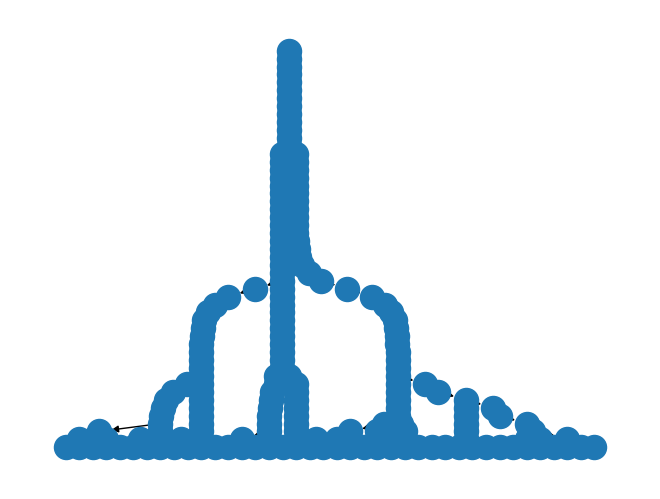

In [58]:
# high pop size, 10 dim, non-elitist
draw_tree(res_dict, '00c2f493-321a-49f9-a4bf-5a12291bf14c', 'trimmed')

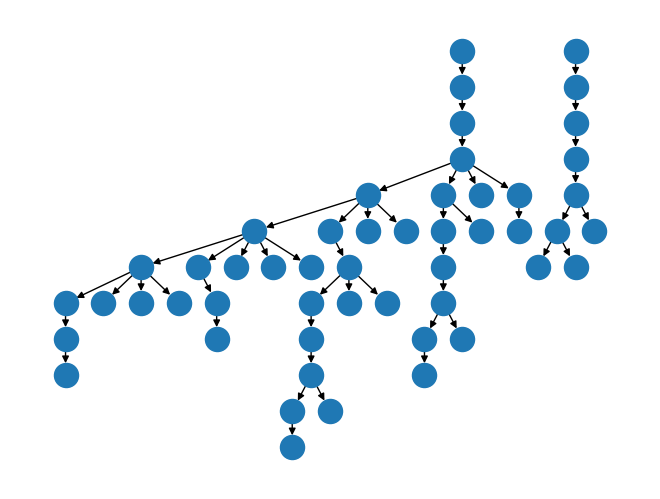

In [61]:
# low pop size, 10 dim, non-elitist
draw_tree(res_dict, '2c678374-2054-436d-b5bf-232c5f16a04a', 'trimmed')